In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

unified_data_path = '/home/maria/LuckyMouse4/data/unified_neuron_data.pkl'

df = pd.read_pickle(unified_data_path)
visp_neurons_non_significant = df[(df['brain_area'] == 'VISp') & (df['status'] == 'non_significant')]
visp_neurons_significant = df[(df['brain_area'] == 'VISp') & (df['status'] == 'significant')]
non_significant = np.vstack(visp_neurons_non_significant['vector'].to_numpy()) 
significant = np.vstack(visp_neurons_significant['vector'].to_numpy()) 

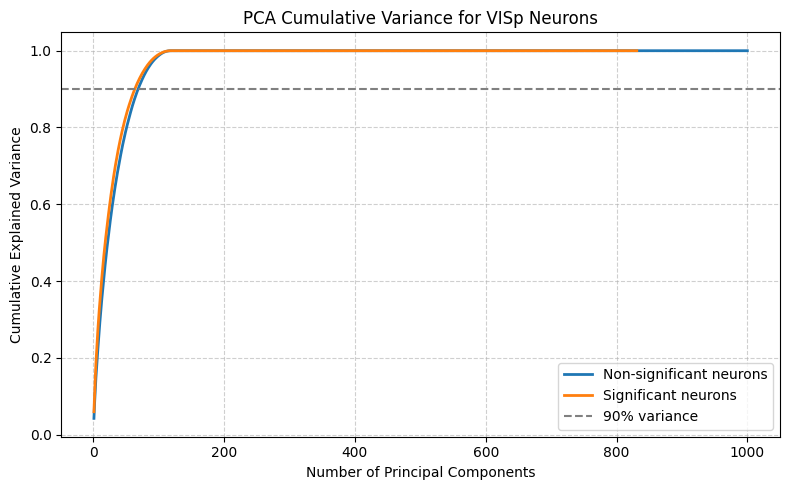

In [14]:
# ─── PCA Function ────────────────────────────────────────────────────────────
def compute_cumulative_variance(X):
    pca = PCA()
    pca.fit(X)
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    return cum_var

cum_var_non_sig = compute_cumulative_variance(non_significant)
cum_var_sig = compute_cumulative_variance(significant)

# ─── Plot Cumulative Variance ────────────────────────────────────────────────
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cum_var_non_sig)+1), cum_var_non_sig, label='Non-significant neurons', linewidth=2)
plt.plot(np.arange(1, len(cum_var_sig)+1), cum_var_sig, label='Significant neurons', linewidth=2)
plt.axhline(y=0.9, color='gray', linestyle='--', label='90% variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Variance for VISp Neurons')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Principal angles (degrees):
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.53773646e-07
 8.53773646e-07 8.53773646e-07 8.53773646e-07 8.53773646e-07
 8.53773646e-07 8.53773646e-07 8.53773646e-07 8.53773646e-07
 1.20741827e-06 1.20741827e-06 1.20741827e-06 1.20741827e

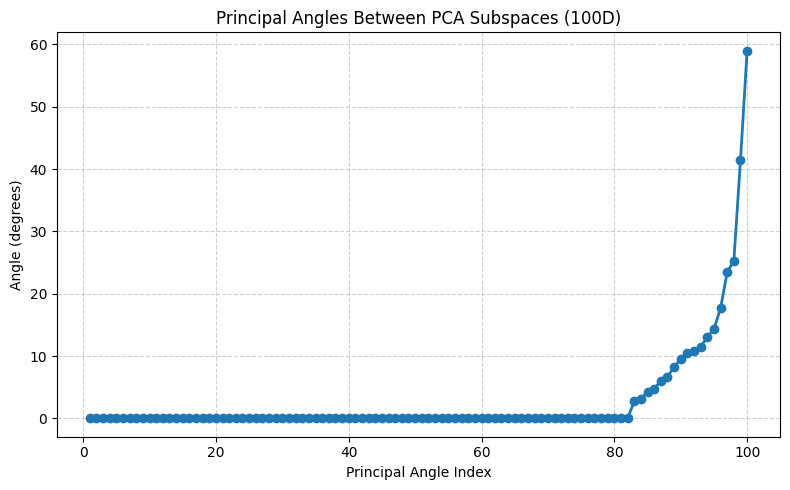

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.linalg import svd
import matplotlib.pyplot as plt

# ─── Load Data ───────────────────────────────────────────────────────────────
unified_data_path = '/home/maria/LuckyMouse4/data/unified_neuron_data.pkl'
df = pd.read_pickle(unified_data_path)

# Filter subsets
visp_neurons_non_significant = df[(df['brain_area'] == 'VISp') & (df['status'] == 'non_significant')]
visp_neurons_significant = df[(df['brain_area'] == 'VISp') & (df['status'] == 'significant')]

non_significant = np.vstack(visp_neurons_non_significant['vector'].to_numpy()) 
significant = np.vstack(visp_neurons_significant['vector'].to_numpy()) 

# ─── PCA with top 100 components ─────────────────────────────────────────────
k = 100
pca_non_sig = PCA(n_components=k).fit(non_significant)
pca_sig = PCA(n_components=k).fit(significant)

# Extract basis vectors (principal component directions)
U = pca_non_sig.components_.T   # shape (features, k)
V = pca_sig.components_.T       # shape (features, k)

# ─── Compute principal angles between subspaces ──────────────────────────────
# Singular values of U^T V give cosines of principal angles
M = U.T @ V
_, s, _ = svd(M)
s = np.clip(s, -1.0, 1.0)  # numerical safety

angles_rad = np.arccos(s)
angles_deg = np.degrees(angles_rad)

print("Principal angles (degrees):")
print(angles_deg)
print(f"\nMinimum angle: {angles_deg.min():.4f}°")
print(f"Maximum angle: {angles_deg.max():.4f}°")
print(f"Mean angle:    {angles_deg.mean():.4f}°")

# ─── Plot principal angles ───────────────────────────────────────────────────
plt.figure(figsize=(8,5))
plt.plot(range(1, len(angles_deg)+1), angles_deg, 'o-', linewidth=2)
plt.xlabel("Principal Angle Index")
plt.ylabel("Angle (degrees)")
plt.title("Principal Angles Between PCA Subspaces (100D)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Principal angles (degrees):
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.53773646e-07
 8.53773646e-07 8.53773646e-07 8.53773646e-07 1.20741827e-06
 1.20741827e-06 1.20741827e-06 1.20741827e-06 1.20741827e-06
 1.20741827e-06 1.47877933e-06 1.47877933e-06 1.47877933e-06
 1.47877933e-06 1.70754729e-06 1.70754729e-06 1.70754729e-06
 1.70754729e-06 1.70754729e-06 1.70754729e-06 1.70754729e-06
 1.70754729e-06 1.90909591e-06 1.90909591e-06 1.90909591e-06
 2.09130979e-06 2.09130979e-06 2.09130979e-06 2.09130979e-06
 2.09130979e-06 2.09130979e-06 2.25887274e-06 2.69986933e-06
 2.95755867e-06 3.07832466e-06 1.21089115e+00 1.44332665e+00
 2.17780125e+00 2.34550897e+00 2.95914485e+00 3.24338576e+00
 3.86664923e+00 4.19042827e+00 4.42098380e+00 4.83727948e+00
 5.20041116e+00 5.89740422e+00 6.29644043e+00 6.95549168e+00
 7.60115073e+00 7.83669716e+00 8.02236908e+00 8.44365655e+00
 8.81029165e+00 9.11010016e+00 1.02826660e+01 1.16964503e

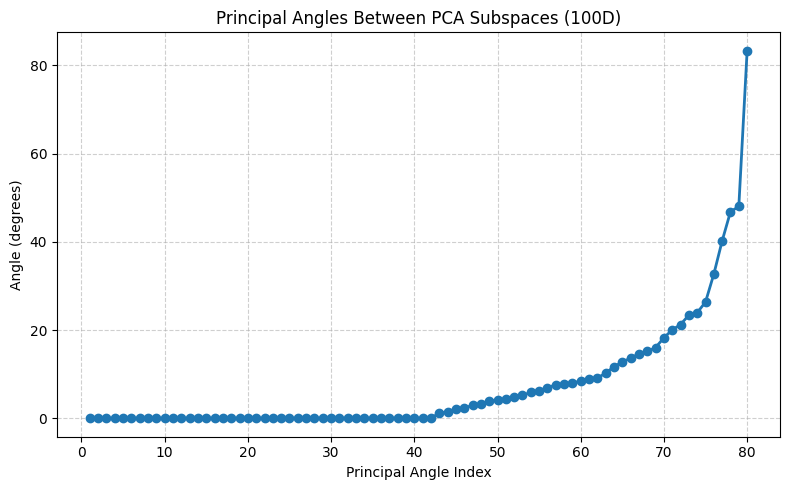

In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.linalg import svd
import matplotlib.pyplot as plt

# ─── Load Data ───────────────────────────────────────────────────────────────
unified_data_path = '/home/maria/LuckyMouse4/data/unified_neuron_data.pkl'
df = pd.read_pickle(unified_data_path)

# Filter subsets
visp_neurons_non_significant = df[(df['brain_area'] == 'VISp') & (df['status'] == 'non_significant')]
visp_neurons_significant = df[(df['brain_area'] == 'VISp') & (df['status'] == 'significant')]

non_significant = np.vstack(visp_neurons_non_significant['vector'].to_numpy()) 
significant = np.vstack(visp_neurons_significant['vector'].to_numpy()) 

# ─── PCA with top 100 components ─────────────────────────────────────────────
k = 80
pca_non_sig = PCA(n_components=k).fit(non_significant)
pca_sig = PCA(n_components=k).fit(significant)

# Extract basis vectors (principal component directions)
U = pca_non_sig.components_.T   # shape (features, k)
V = pca_sig.components_.T       # shape (features, k)

# ─── Compute principal angles between subspaces ──────────────────────────────
M = U.T @ V
_, s, _ = svd(M)
s = np.clip(s, -1.0, 1.0)  # numerical safety

angles_rad = np.arccos(s)
angles_deg = np.degrees(angles_rad)

# ─── Compute subspace overlap ────────────────────────────────────────────────
overlap = np.mean(s**2)  # average of cos²(theta)

print("Principal angles (degrees):")
print(angles_deg)
print(f"\nMinimum angle: {angles_deg.min():.4f}°")
print(f"Maximum angle: {angles_deg.max():.4f}°")
print(f"Mean angle:    {angles_deg.mean():.4f}°")
print(f"\nSubspace overlap score: {overlap:.4f} (1 = identical, 0 = orthogonal)")

# ─── Plot principal angles ───────────────────────────────────────────────────
plt.figure(figsize=(8,5))
plt.plot(range(1, len(angles_deg)+1), angles_deg, 'o-', linewidth=2)
plt.xlabel("Principal Angle Index")
plt.ylabel("Angle (degrees)")
plt.title("Principal Angles Between PCA Subspaces (100D)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


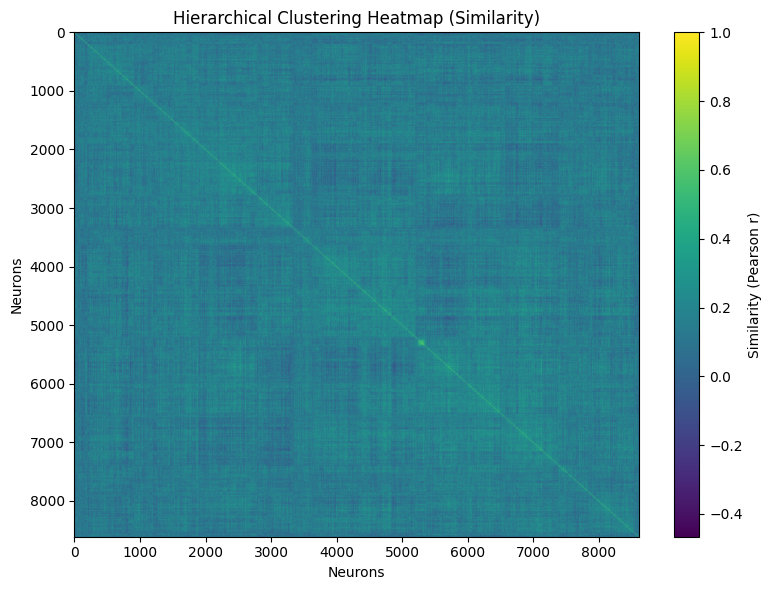

In [8]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

# ─── Load Data ───────────────────────────────────────────────────────────────
unified_data_path = '/home/maria/LuckyMouse4/data/unified_neuron_data.pkl'
df = pd.read_pickle(unified_data_path)

# Filter VISp significant neurons
visp_neurons = df[(df['brain_area'] == 'VISp') & (df['status'] == 'non_significant')]

# ─── Extract Features ───────────────────────────────────────────────────────
# Assuming your data has a column 'response_vector' or similar that is a list/array
# Replace 'response_vector' with the actual feature column name
data = np.vstack(visp_neurons['vector'].to_numpy()) # shape: (neurons, features)

# ─── Compute similarity matrix (Pearson correlation) ─────────────────────────
similarity_matrix = np.corrcoef(data)

# ─── Convert to distance matrix (1 - similarity) ─────────────────────────────
distance_matrix = 1 - similarity_matrix

# Ensure symmetry and zero diagonal (important for squareform)
distance_matrix = (distance_matrix + distance_matrix.T) / 2
np.fill_diagonal(distance_matrix, 0)

# ─── Perform Hierarchical Clustering ─────────────────────────────────────────
linkage_matrix = linkage(squareform(distance_matrix), method='average')
order = leaves_list(linkage_matrix)

# ─── Reorder similarity matrix according to clustering ───────────────────────
reordered_similarity = similarity_matrix[order][:, order]

# ─── Plot heatmap ────────────────────────────────────────────────────────────
plt.figure(figsize=(8, 6))
plt.imshow(reordered_similarity, cmap='viridis', aspect='auto')
plt.colorbar(label="Similarity (Pearson r)")
plt.title("Hierarchical Clustering Heatmap (Similarity)")
plt.xlabel("Neurons")
plt.ylabel("Neurons")
plt.tight_layout()
plt.show()
